In [ ]:
from CellClass import MCImage, imread
from CellClass.Segment import Segmentation
from CellClass.process_masks import get_cell_patches
from CellClass.Preprocessing import illumination, apply_clahe
import matplotlib.pyplot as plt

DC = Segmentation("deepcell")
CP = Segmentation("cellpose")

In [ ]:
%matplotlib inline
import numpy as np
img = imread("/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/MYCN_SpikeIn/processed/S4_461.tif")
MCIm = MCImage(img, scheme="BGR")
MCIm.normalize()

MCIm.B = apply_clahe(MCIm.B)

_, res, o_dc = DC(MCIm.B, return_outline=True, image_mpp=.4, MCIm=MCIm)
_, res, o_cp = CP(MCIm.B, return_outline=True, MCIm=MCIm)

plt.rcParams['figure.figsize'] = 20,20

plt.imshow(o_dc)
plt.show()
plt.imshow(o_cp)
plt.show()

In [ ]:
import os
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

base = "/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/MYCN_SpikeIn/patches"
files = [os.path.join(base, x) for x in os.listdir(base) if "S29" in x]

In [ ]:
patches = []
for f in tqdm(files[:10]):
    with open(f, "rb") as fin:
        patches.extend(pkl.load(fin))

In [ ]:
print(len(patches))

In [ ]:
import numpy as np
fig, axs = plt.subplots(10, 10, figsize=(30, 30))
for ax, p in zip(axs.ravel(), patches[:100]):
    ax.imshow(np.stack((p.R, np.zeros_like(p.B), p.B), axis=-1))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title([round(p.B[p.mask].mean(),2),round(p.R[p.mask].mean(),2)], color="white")

In [306]:
import cv2
def get_spots(im):
    
    binary = get_binary(im, 7, 0.2, 1, 1.6)
    
    connectivity = 8
    output = cv2.connectedComponentsWithStats(binary, connectivity)
    print(output[0]-1)
    
    if np.any(output[2][1:, -1] > 30):
            plt.imshow(output[1].astype("uint8")); plt.show()
            plt.imshow(imlim=); plt.show()
    


def get_binary(im, e, t, s0, s1):
    
    m = cv2.erode(p.mask.astype("uint8"), cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (e, e))).astype(bool)
    dog_im = DoG(im, s0, s1)
    dog_im[~m] = 0
    dog_im[dog_im > t] = 1
    dog_im[dog_im < t] = 0
    
    return dog_im.astype("uint8")


def DoG(im, s0=1, s1=1.6):
    sig0 = cv2.GaussianBlur(im, (31,31), s0, s0)
    sig1 = cv2.GaussianBlur(im, (31,31), s1, s1)
    ret = sig0-sig1
    ret[ret<0] = 0
    return (ret-ret.min())/(ret.max()-ret.min())

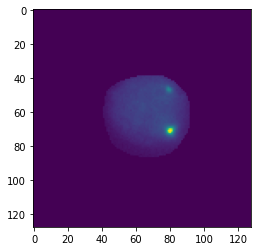

2


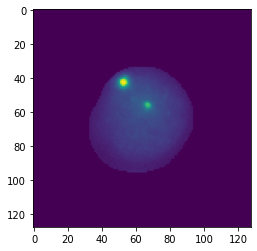

2


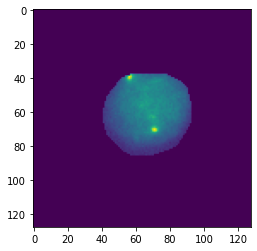

2


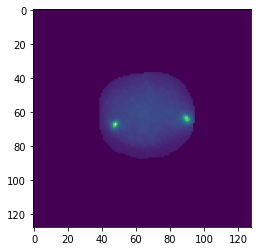

2


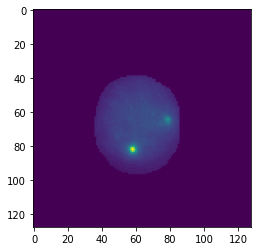

2


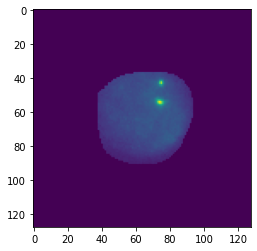

2


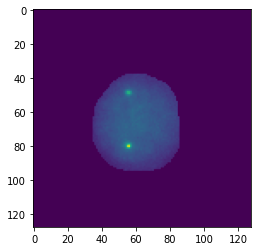

2


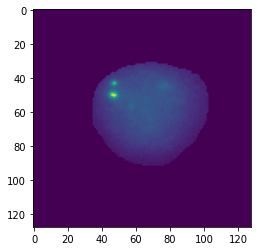

2


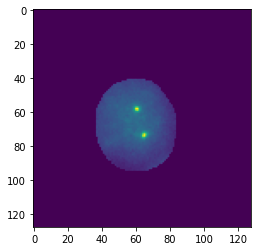

2


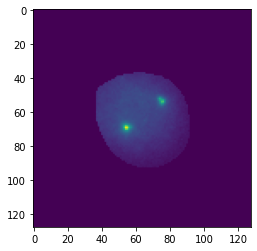

2


In [307]:

for i in range(10):
    
    p = patches[i]

    get_spots(p.R)

In [299]:
import numpy as np
fig, axs = plt.subplots(10, 10, figsize=(30, 30))
for ax, p in zip(axs.ravel(), patches[:100]):
    ax.imshow(p.R)
    ax.imshow(get_binary(p.R, 7, 0.25, 1, 1.6), alpha=0.2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title([round(p.B[p.mask].mean(),2),round(p.R[p.mask].mean(),2)], color="white")
    break

Error in callback <function flush_figures at 0x7fefac3aa160> (for post_execute):


KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(20, 2, figsize=(20,20))
for i, e in enumerate([3, 5, 7, 9]):
    for ii, t in enumerate([.1, .2, .3, .4, .5]):
        for s in [1, 1.8]:
            n = []
            ims = []
            pos = []
            for p in patches:
                binary, _ = get_binary(p.R, e=e, t=t, s0=s, s1=s*1.6)
                binary = binary.astype("uint8")
                # connectivity = 8
                # output = cv2.connectedComponentsWithStats(binary, connectivity)
                # num_labels = output[0]
                # pos.append(output[3][1:,:])
                # n.append(num_labels-1)
                # ims.append(p.R)
                
            # hist = np.array([(n.count(x),x) for x in range(10)])
            # ax[i,ii].bar(hist[:,1], hist[:,0])
            # ax[i,ii].set_xticks(list(range(10)));
            # ax[i,ii].set_ylim([0,len(patches)])
            # ax[i,ii].set_title([e, t, round((hist[2,0]/np.sum(hist[:,0])*100),2), s])

In [ ]:
e =
t = 0.2
s0 = 2
  
n = []
ims = []
pos = []
dogs = []
for p in patches:
    binary, dog = get_binary(p.R, e=e, t=t, s0=s0, s1=s0*1.6)
    binary = binary.astype("uint8")
    connectivity = 8
    output = cv2.connectedComponentsWithStats(binary, connectivity)
    num_labels = output[0]
    pos.append(output[3][1:,:])
    n.append(num_labels-1)
    ims.append(p.R)
    dogs.append(dog)   
    
hist = np.array([(n.count(x),x) for x in range(10)])
plt.bar(hist[:,1], hist[:,0])
plt.xticks(list(range(10)));
plt.ylim([0,len(patches)]);
plt.title([e, t, round((hist[2,0]/np.sum(hist[:,0])*100),2)]);

In [ ]:
%matplotlib inline
sz = 10
fig, axs = plt.subplots(sz, sz, figsize=(30, 30))
axs = axs.ravel()
c=0
for i in range(len(patches)):
    if c == sz**2:
        break
    if n[i] == 2:
        axs[c].imshow(dogs[i], cmap="Reds")
        axs[c].scatter(pos[i][:,0], pos[i][:,1], s=80, facecolors='none', edgecolors='black')
        axs[c].set_xticks([])
        axs[c].set_yticks([])
        axs[c].set_title(n[i], color="white")
        c+=1

In [ ]:
p = patches[21]

%matplotlib qt

plt.rcParams['figure.figsize'] = 10,10
plt.imshow(p.R, cmap="Reds")
plt.imshow(p.mask, alpha=0.2, cmap="jet"); plt.show()
# plt.imshow(p.B, cmap="Blues"); plt.show()
# plt.imshow(p.G, cmap="Greens"); plt.show()

e = 9

for s in [.2, 1, 2.0]:
    ret = DoG(p.R, s0=s, s1=s*1.6)
    m = cv2.erode(p.mask.astype("uint8"), cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (e, e))).astype(bool)
    ret2 = np.copy(ret)
    ret2[~m] = 0
    
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    X = range(128)
    X, Y = np.meshgrid(X, X)


    # Plot the surface.
    ax.plot_wireframe(X, Y, ret, color='black', alpha=0.5)
    ax.plot_wireframe(X, Y, ret2, color='red', alpha=0.5)
    ax.set_title([s, s*1.6])
    plt.show()